In [1]:
import pandas as pd

In [17]:
metric = 'mcc'
folder1 = '../final_results_internal'
name1 = 'Training cohort'
folder2 = '../final_results'
name2 = 'Validation cohort'

In [18]:
results_folder1 = pd.read_csv(f'{folder1}/{metric}_accumulated.csv', index_col=0)
results_folder1.drop(index='DummyClassifier', inplace=True)
results_folder2 = pd.read_csv(f'{folder2}/{metric}_accumulated.csv', index_col=0)
results_folder2.drop(index='DummyClassifier', inplace=True)
#final_results_corr95_prc = pd.read_csv('final_results_corr95/prc_auc_accumulated.csv', index_col=0)
#final_results_corr95_prc.drop(index='DummyClassifier', inplace=True)

In [19]:
results_folder1

,30d_mortality_ci_95_hi,30d_mortality_ci_95_lo,30d_mortality_mean,30d_mortality_std,90d_mortality_ci_95_hi,90d_mortality_ci_95_lo,90d_mortality_mean,90d_mortality_std
DecisionTreeClassifier,0.073496,0.024448,0.048972,0.125124,0.193427,0.131180,0.162304,0.158794
GradientBoostingClassifier,0.037671,0.003424,0.020548,0.087366,0.182246,0.102990,0.142618,0.202185
LinearSVC,0.184212,0.088281,0.136247,0.244722,0.386221,0.302858,0.344539,0.212663
LogisticRegression,0.279057,0.203905,0.241481,0.191714,0.478878,0.421349,0.450113,0.146759
MLPClassifier,0.114526,0.057158,0.085842,0.146348,0.379419,0.294026,0.336722,0.217838
RandomForestClassifier,0.160423,0.103112,0.131768,0.146201,0.457966,0.397540,0.427753,0.154149
SVC,0.105596,0.030645,0.068121,0.191201,0.356153,0.265530,0.310842,0.231181


In [20]:
results_folder2

,30d_mortality_ci_95_hi,30d_mortality_ci_95_lo,30d_mortality_mean,30d_mortality_std,90d_mortality_ci_95_hi,90d_mortality_ci_95_lo,90d_mortality_mean,90d_mortality_std,Death_within_primary_stay_ci_95_hi,Death_within_primary_stay_ci_95_lo,Death_within_primary_stay_mean,Death_within_primary_stay_std
DecisionTreeClassifier,0.100253,0.059113,0.079683,0.104949,0.173948,0.130795,0.152372,0.110084,0.166802,0.123158,0.144980,0.111336
GradientBoostingClassifier,0.061787,0.021174,0.041480,0.103604,0.199410,0.140154,0.169782,0.151164,0.117294,0.059260,0.088277,0.148046
LinearSVC,0.309447,0.280694,0.295071,0.073351,0.364339,0.346954,0.355647,0.044347,0.306021,0.295024,0.300522,0.028053
LogisticRegression,0.364036,0.339158,0.351597,0.063464,0.473066,0.451999,0.462532,0.053743,0.306800,0.292739,0.299770,0.035869
MLPClassifier,0.277062,0.216994,0.247028,0.153234,0.406205,0.357511,0.381858,0.124218,0.363235,0.330661,0.346948,0.083097
RandomForestClassifier,0.155596,0.123176,0.139386,0.082705,0.270748,0.240886,0.255817,0.076178,0.323715,0.298749,0.311232,0.063690
SVC,0.245106,0.197463,0.221285,0.121538,0.368050,0.341671,0.354860,0.067295,0.291850,0.272619,0.282235,0.049057


In [21]:
for ep in ['30d', '90d']:
    results_folder1[f'{ep}_mortality_err_hi'] = results_folder1[f'{ep}_mortality_ci_95_hi'] - results_folder1[f'{ep}_mortality_mean']
    results_folder1[f'{ep}_mortality_err_lo'] = results_folder1[f'{ep}_mortality_mean'] - results_folder1[f'{ep}_mortality_ci_95_lo']
    results_folder2[f'{ep}_mortality_err_hi'] = results_folder2[f'{ep}_mortality_ci_95_hi'] - results_folder2[f'{ep}_mortality_mean']
    results_folder2[f'{ep}_mortality_err_lo'] = results_folder2[f'{ep}_mortality_mean'] - results_folder2[f'{ep}_mortality_ci_95_lo']

In [22]:
relevant_cols = ['30d_mortality_mean', '30d_mortality_err_hi', '90d_mortality_mean', '90d_mortality_err_hi']

sub_df1 = results_folder1[relevant_cols]
sub_df2 = results_folder2[relevant_cols]

joined_df_for_barchart = pd.merge(sub_df1, sub_df2, left_index=True, right_index=True, suffixes=['_train', '_val'])

In [23]:
joined_df_for_barchart.to_csv(f'bar_data_{metric}.csv', sep='\t', decimal=',')

In [34]:
comparison_30d = pd.DataFrame(results_folder1['30d_mortality_mean'])
comparison_30d.rename(columns={'30d_mortality_mean': name1}, inplace=True)
comparison_30d[name2] = results_folder2['30d_mortality_mean']
#comparison_30d['new_results_corr95'] = final_results_corr95_prc['30d_mortality_mean']

In [35]:
comparison_30d

,Training cohort,Validation cohort
DecisionTreeClassifier,0.076799,0.108228
GradientBoostingClassifier,0.046064,0.088710
LinearSVC,0.097891,0.245867
LogisticRegression,0.089664,0.260457
MLPClassifier,0.056707,0.164190
RandomForestClassifier,0.045715,0.062712
SVC,0.073398,0.192408


In [36]:
comparison_90d = pd.DataFrame(results_folder1['90d_mortality_mean'])
comparison_90d.rename(columns={'90d_mortality_mean': name1}, inplace=True)
comparison_90d[name2] = results_folder2['90d_mortality_mean']
#comparison_30d['new_results_corr95'] = final_results_corr95_prc['30d_mortality_mean']

In [37]:
comparison_90d

,Training cohort,Validation cohort
DecisionTreeClassifier,0.136064,0.187927
GradientBoostingClassifier,0.184316,0.261326
LinearSVC,0.249604,0.398992
LogisticRegression,0.274232,0.453386
MLPClassifier,0.235227,0.393609
RandomForestClassifier,0.269050,0.232006
SVC,0.255588,0.363318


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ep = '90d'

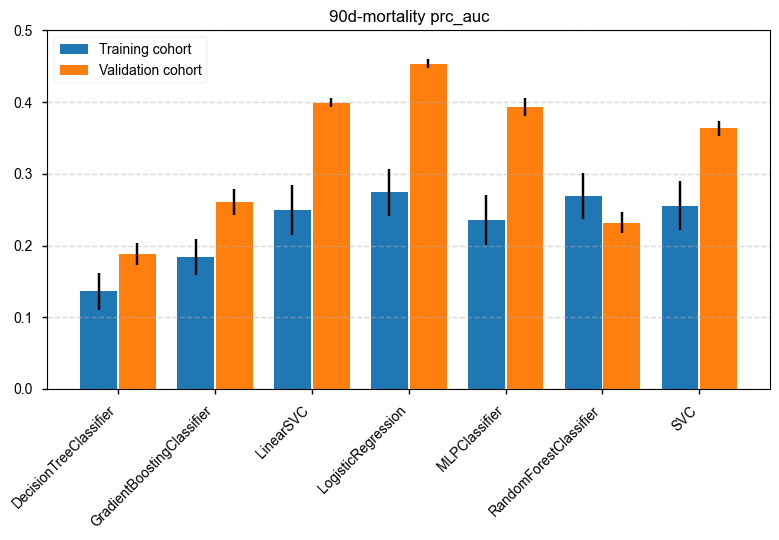

In [22]:
xs = range(len(results_folder1.index))
plt.rcParams['font.family'] = "Arial"
plt.style.use('seaborn-notebook')
    
plt.bar([x - 0.2 for x in xs], results_folder1[f'{ep}_mortality_mean'], 
        #tick_label=results_folder1.index,
        yerr=(results_folder1[f'{ep}_mortality_err_lo'], results_folder1[f'{ep}_mortality_err_hi']),
        width=0.38)
plt.bar([x + 0.2 for x in xs], results_folder2[f'{ep}_mortality_mean'], 
        #tick_label=results_folder2.index,
        yerr=(results_folder2[f'{ep}_mortality_err_lo'], results_folder2[f'{ep}_mortality_err_hi']),
        width=0.38)
plt.xticks(ticks=xs, labels=results_folder1.index, rotation=45, ha='right')
plt.ylim(0, 0.5)
plt.legend([name1, name2], loc='upper left')
plt.title(f'{ep}-mortality {metric}')
plt.grid(which='major', axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
#plt.show()
plt.savefig(f'../{ep}_{metric}.png', dpi=300)